In [1]:
import csv
import matplotlib
import numpy as np
import sys
%matplotlib inline
from matplotlib import pyplot as plt
filename ="C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python38\\New folder\\COVID_Dataset.csv" 
list1=[]
with open(filename, 'r') as data:
    for line in csv.DictReader(data): 
        list1.append(line)

listoftimeofinf,listoftimeofrep,xlocation,ylocation,Age,Diabetes,Respiratory,BP,outcome=[],[],[],[],[],[],[],[],[]
for value in list1:
    listoftimeofinf.append(int(value['Time of Infection']))
    listoftimeofrep.append(int(value['Time of reporting']))
    xlocation.append(int(value['x location']))
    ylocation.append(int(value['y location']))
    Age.append(int(value['Age']))
    Diabetes.append(value['Diabetes'])
    Respiratory.append(value['Respiratory Illnesses'])
    BP.append(value['Abnormal Blood Pressure'])
    outcome.append(value['Outcome'])

def CountFrequency(my_list): 
   count = {} 
   for i in my_list: 
    count[i] = count.get(i, 0) + 1
   return count

superlist=[listoftimeofinf,listoftimeofrep,xlocation,ylocation,Age,Diabetes,Respiratory,BP,outcome]

options='''
1 Time of Infection vs cases graph
2 Time of Reporting vs cases graph
3 Age vs cases graph
4 Contraction chances because of Diabetic/Non-Diabetic
5 Contraction chances because of Respiratory Illnesses/Non-Respiratory Illnesses
6 Contraction chances because of Abnormal Blood Pressure/Normal Blood Pressure Illnesses
7 Recovery vs Death
8 Exit
'''

while True:
    print(options)
    inputval=int(input())
    if inputval==1:
        dict1=CountFrequency(listoftimeofinf)
        xpos=list(dict1.keys())
        ypos=list(dict1.values())
    elif inputval==2:
        dict1=CountFrequency(listoftimeofrep)
        xpos=list(dict1.keys())
        ypos=list(dict1.values())
    elif inputval==3:
        plt.hist(Age,bins=range(min(Age),max(Age)+1))
        plt.xlabel('Age')
        plt.ylabel('Cases')
        plt.show()
    elif inputval==4:
        histlist=[]
        histlist1=[]
        for j in Diabetes:
            if j=='True':
                histlist.append(int(1))
            else:
                histlist1.append(int(5))
        plt.hist(histlist,bins=[0,2],facecolor='red',label='Diabetic')
        plt.hist(histlist1,bins=[4,6],facecolor='blue',label='Non-Diabetic')
        plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
        plt.legend(loc='best')
        plt.xlabel('Diabetic/Non-Diabetic')
        plt.ylabel('Cases')
        plt.show()
    elif inputval==5:
        histlist=[]
        histlist1=[]
        for j in Respiratory:
            if j=='True':
                histlist.append(int(1))
            else:
                histlist1.append(int(5))
        plt.hist(histlist,bins=[0,2],facecolor='red',label='Respiratory Illnesses')
        plt.hist(histlist1,bins=[4,6],facecolor='blue',label='Non-Respiratory Illnesses')
        plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
        plt.legend(loc='best')
        plt.xlabel('Respiratory Illnesses/Non-Respiratory Illnesses')
        plt.ylabel('Cases')
        plt.show()
    elif inputval==6:
        histlist=[]
        histlist1=[]
        for j in BP:
            if j=='True':
                histlist.append(int(1))
            else:
                histlist1.append(int(5))
        plt.hist(histlist,bins=[0,2],facecolor='red',label='Abnormal Blood Pressure')
        plt.hist(histlist1,bins=[4,6],facecolor='blue',label='Normal Blood Pressure')
        plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
        plt.legend(loc='best')
        plt.xlabel('Blood Pressure Type')
        plt.ylabel('Cases')
        plt.show()
    elif inputval==7:
        histlist=[]
        histlist1=[]
        for j in outcome:
            if j=='Dead':
                histlist.append(int(1))
            else:
                histlist1.append(int(5))
        plt.hist(histlist,bins=[0,2],facecolor='red',label='Dead')
        plt.hist(histlist1,bins=[4,6],facecolor='blue',label='Alive')
        plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False) 
        plt.legend(loc='best')
        plt.xlabel('Deaths')
        plt.ylabel('Cases')
        plt.show()
    elif inputval==8:
        break
        sys.exit(0)
    else:
        print("Please enter values between 1 to 8")
        continue
    plt.savefig('Image.png', dpi=1000)
    
    if inputval in [1,2]:
        plt.scatter(xpos,ypos)
        plt.ylabel('Cases')
        plt.xlabel('Time')
        plt.show()


1 Time of Infection vs cases graph
2 Time of Reporting vs cases graph
3 Age vs cases graph
4 Contraction chances because of Diabetic/Non-Diabetic
5 Contraction chances because of Respiratory Illnesses/Non-Respiratory Illnesses
6 Contraction chances because of Abnormal Blood Pressure/Normal Blood Pressure Illnesses
7 Recovery vs Death
8 Exit



ValueError: invalid literal for int() with base 10: ''

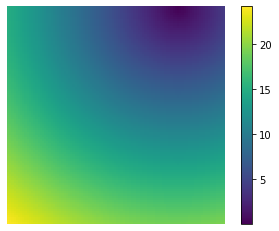

In [3]:
import csv
import matplotlib
import numpy as np
import sys
import random
%matplotlib inline
from matplotlib import pyplot as plt
dataset ="C:\\Users\\Admin\\AppData\\Local\\Programs\\Python\\Python38\\New folder\\COVID_Dataset.csv"
population="Population.csv"

list1=[]
with open(dataset, 'r') as data:
    for line in csv.DictReader(data): 
        list1.append(line)

xlocation,ylocation=[],[]

for value in list1:
    xlocation.append(int(value['x location']))
    ylocation.append(int(value['y location']))

def distance_2d(x_point, y_point, x, y):
    return np.hypot(x-x_point, y-y_point)

ys, xs = np.ogrid[1:20:100j, 1:20:100j]
distances = distance_2d(xlocation[random.randint(0,len(xlocation))],ylocation[random.randint(0,len(ylocation))], xs, ys)
plt.figure()
plt.title('')
plt.imshow(distances, origin='lower', interpolation="none")
plt.xticks(np.arange(xs.shape[1]), xs.ravel())
plt.yticks(np.arange(ys.shape[0]), ys.ravel())
plt.axis('off')
plt.colorbar()